# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [2]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [78]:
# Data handling
import pandas as pd
import numpy as np
import scipy.stats as stats


# Vizualisation (atplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os, pickle 


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
# For CSV, use pandas.read_csv
df_test = pd.read_csv('D:\LP6\Embedding-ML-Model-into-a-Web-App\dataset\Paitients_Files_Test.csv')
df_train = pd.read_csv('D:\LP6\Embedding-ML-Model-into-a-Web-App\dataset\Paitients_Files_Train.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

Train data

In [5]:
df_train.shape

(599, 11)

In [6]:
df_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
pd.unique(df_train["ID"])

array(['ICU200010', 'ICU200011', 'ICU200012', 'ICU200013', 'ICU200014',
       'ICU200015', 'ICU200016', 'ICU200017', 'ICU200018', 'ICU200019',
       'ICU200020', 'ICU200021', 'ICU200022', 'ICU200023', 'ICU200024',
       'ICU200025', 'ICU200026', 'ICU200027', 'ICU200028', 'ICU200029',
       'ICU200030', 'ICU200031', 'ICU200032', 'ICU200033', 'ICU200034',
       'ICU200035', 'ICU200036', 'ICU200037', 'ICU200038', 'ICU200039',
       'ICU200040', 'ICU200041', 'ICU200042', 'ICU200043', 'ICU200044',
       'ICU200045', 'ICU200046', 'ICU200047', 'ICU200048', 'ICU200049',
       'ICU200050', 'ICU200051', 'ICU200052', 'ICU200053', 'ICU200054',
       'ICU200055', 'ICU200056', 'ICU200057', 'ICU200058', 'ICU200059',
       'ICU200060', 'ICU200061', 'ICU200062', 'ICU200063', 'ICU200064',
       'ICU200065', 'ICU200066', 'ICU200067', 'ICU200068', 'ICU200069',
       'ICU200070', 'ICU200071', 'ICU200072', 'ICU200073', 'ICU200074',
       'ICU200075', 'ICU200076', 'ICU200077', 'ICU200078', 'ICU2

Test data

In [11]:
df_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df_test.shape

(169, 10)

In [13]:
df_test.info

<bound method DataFrame.info of             ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1

[169 rows x 10 columns]>

In [14]:
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [15]:
df_test.duplicated().sum()

0

In [16]:
pd.unique(df_test["ID"])

array(['ICU200609', 'ICU200610', 'ICU200611', 'ICU200612', 'ICU200613',
       'ICU200614', 'ICU200615', 'ICU200616', 'ICU200617', 'ICU200618',
       'ICU200619', 'ICU200620', 'ICU200621', 'ICU200622', 'ICU200623',
       'ICU200624', 'ICU200625', 'ICU200626', 'ICU200627', 'ICU200628',
       'ICU200629', 'ICU200630', 'ICU200631', 'ICU200632', 'ICU200633',
       'ICU200634', 'ICU200635', 'ICU200636', 'ICU200637', 'ICU200638',
       'ICU200639', 'ICU200640', 'ICU200641', 'ICU200642', 'ICU200643',
       'ICU200644', 'ICU200645', 'ICU200646', 'ICU200647', 'ICU200648',
       'ICU200649', 'ICU200650', 'ICU200651', 'ICU200652', 'ICU200653',
       'ICU200654', 'ICU200655', 'ICU200656', 'ICU200657', 'ICU200658',
       'ICU200659', 'ICU200660', 'ICU200661', 'ICU200662', 'ICU200663',
       'ICU200664', 'ICU200665', 'ICU200666', 'ICU200667', 'ICU200668',
       'ICU200669', 'ICU200670', 'ICU200671', 'ICU200672', 'ICU200673',
       'ICU200674', 'ICU200675', 'ICU200676', 'ICU200677', 'ICU2

Null hypothesis: Age is a major determinant of developing sepsis
Alternate hypothesis: Developing sepsis is independent of age

Questions
1. How many patients have the tendency of developing sepsis
2. Which age group are more prone to developing sepsis
3. Does having an insurance enhance patients chances of getting sepsis
4. Which blood parameters are associated with sepsis
5. Is body mass directly correlated with a patients tendency to get sepsis

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [17]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df_test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [19]:
corre = df_train.corr()
corre

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


In [20]:
correlate = df_test.corr()
correlate

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.088808,0.226032,-0.084315,-0.143327,-0.042980,0.041405,0.587779,0.000742
PL,0.088808,1.000000,0.184448,0.070199,0.296815,0.240396,0.119497,0.224456,-0.040125
PR,0.226032,0.184448,1.000000,0.243956,0.064700,0.327511,0.179641,0.292158,-0.134804
SK,-0.084315,0.070199,0.243956,1.000000,0.466503,0.450529,0.214038,-0.086018,-0.023332
TS,-0.143327,0.296815,0.064700,0.466503,1.000000,0.250437,0.051053,-0.159589,-0.114407
M11,-0.042980,0.240396,0.327511,0.450529,0.250437,1.000000,0.201224,-0.001741,-0.001815
BD2,0.041405,0.119497,0.179641,0.214038,0.051053,0.201224,1.000000,0.031738,0.094673
Age,0.587779,0.224456,0.292158,-0.086018,-0.159589,-0.001741,0.031738,1.000000,-0.013863
Insurance,0.000742,-0.040125,-0.134804,-0.023332,-0.114407,-0.001815,0.094673,-0.013863,1.000000


<AxesSubplot:>

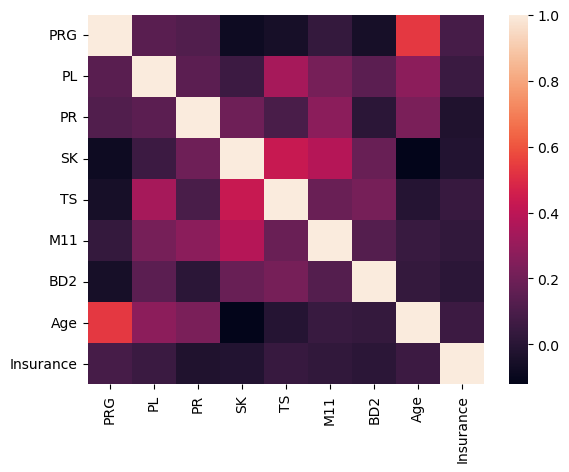

In [21]:
sns.heatmap(corre)
#correlated features are age and prg, sk, ts and m11,

<AxesSubplot:>

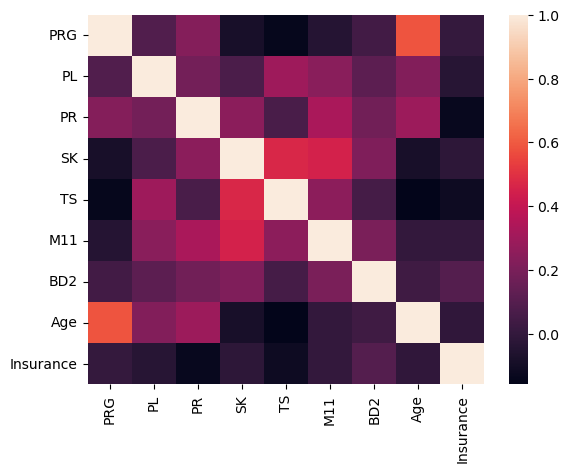

In [22]:
sns.heatmap(correlate)

## How many patients have the tendency of developing sepsis?
208 patient have the tendency of developing sepsis

In [23]:
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()

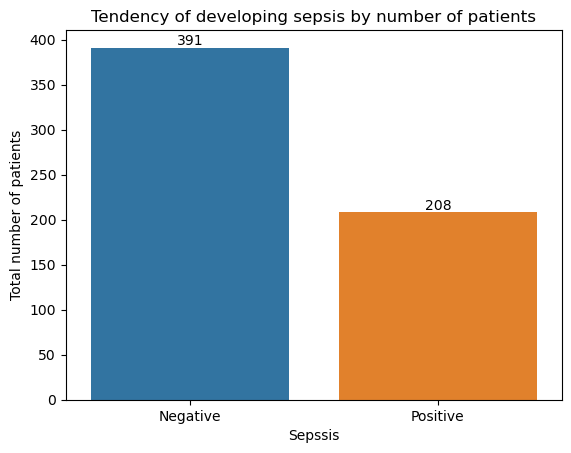

In [24]:
splot = sns.barplot(data=sep, x='Sepssis', y='ID')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()

## Which age group are more prone to developing sepsis?
People between 20-30 years have higher tendency of getting sepsis. Our Null hypothesis is true

In [25]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
age_group

,Age,ID
0,21,5
1,22,6
2,23,6
3,24,6
4,25,12
5,26,6
6,27,5
7,28,10
8,29,13
9,30,5


Text(0.5, 1.0, 'Age group of patients with sepsis')

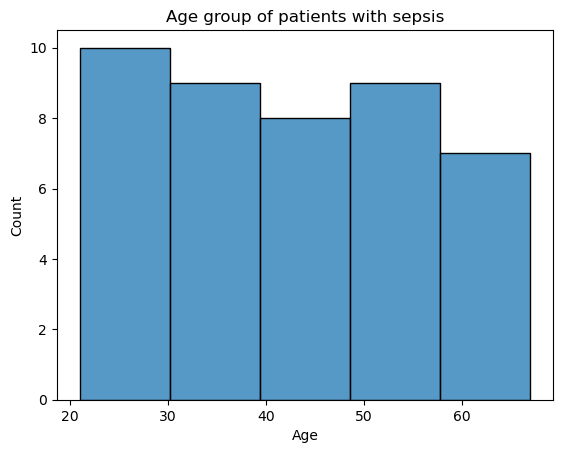

In [26]:
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

## Does having an insurance enhance patients chances of getting sepsis?
No, majority of patients with insurance have no tendency of developing sepsis

Text(0.5, 1.0, 'Insurance of all patients')

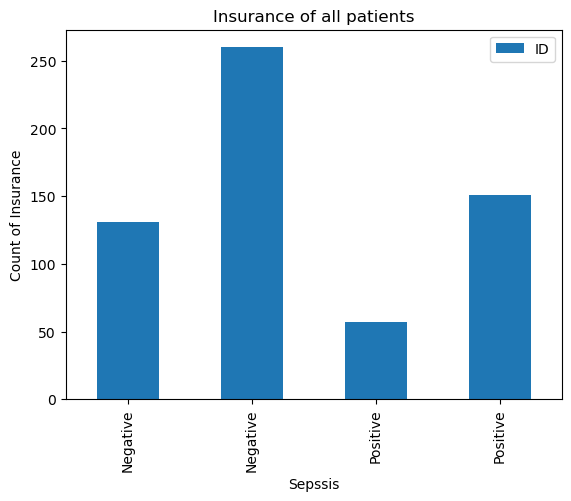

In [27]:
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

## Is body mass directly correlated with a patients tendency to get sepsis?
Per the histogram used to visualize the data, majority of sepsis patient are between a body mass of 30-40. However, there are even a greater number of people with the same body mass without sepsis hence it cannot be concluded that the tendency of a patient getting sepsis is correlated with their body weight. 

In [28]:
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()

In [29]:
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']

Text(0.5, 1.0, 'Body mass of patient with Sepsis')

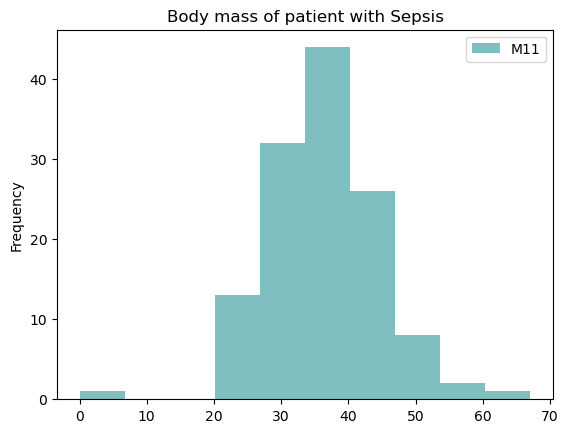

In [30]:
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')

Text(0.5, 1.0, 'Body mass of patient without Sepsis')

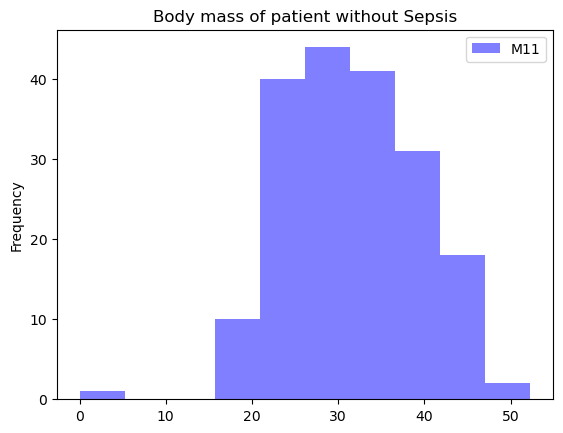

In [31]:
hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')

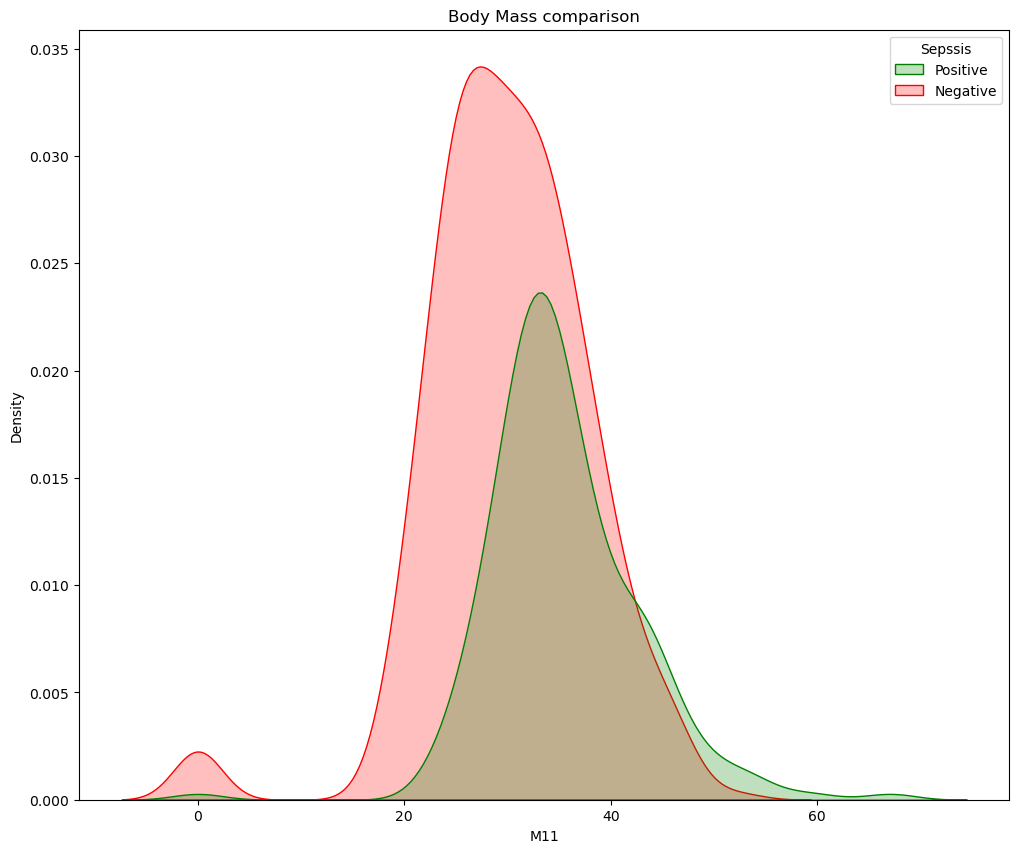

In [32]:
plt.figure(figsize=(12,10))

colors = ["green", "red",]
labels = ['Positive', 'Negative']
sns.set_palette(sns.color_palette(colors))

sns.kdeplot(data=df_train,x='M11',hue='Sepssis', shade = True)
plt.title('Body Mass comparison')
plt.show()

## Which blood parameters are associated with sepsis

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [33]:
df_train.drop(labels=["ID"], axis=1, inplace=True)

## Class inbalance 

C:\Users\clali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 800x800 with 0 Axes>

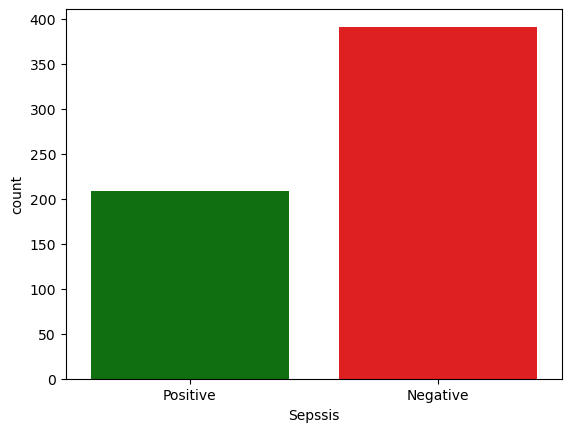

<Figure size 800x800 with 0 Axes>

In [34]:
colors = ["green", "red",]
labels = ['Positive', 'Negative']
sns.set_palette(sns.color_palette(colors))
sns.countplot(df_train.Sepssis)
plt.figure(figsize=(8,8))

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [35]:
# Code Here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [62]:
# Code here
columns =  ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

In [50]:
# Label Encoder on the target column

le = LabelEncoder()
df_train[['Sepssis']] = df_train[['Sepssis']].apply(le.fit_transform) 
X = df_train.drop('Sepssis', axis=1)
y_target = df_train['Sepssis']

In [44]:
X.shape

(599, 9)

In [49]:
X

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


In [51]:
y_target

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64

In [ ]:
df_train

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [56]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [60]:
def scale_data(data, scaler, columns):
    scaled_data = scaler.transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=columns)
    return scaled_df

In [63]:
# Scaling on train dataset

X_scaled = scale_data(X, scaler, columns)
X_scaled

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.352941,0.747475,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0
1,0.058824,0.429293,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.924242,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.449495,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1.0
4,0.000000,0.691919,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
594,0.352941,0.621212,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0.0
595,0.000000,0.949495,0.672131,0.141414,0.218676,0.476900,0.257899,0.016667,1.0
596,0.000000,0.338384,0.622951,0.000000,0.000000,0.675112,0.049530,0.416667,1.0
597,0.058824,0.449495,0.196721,0.191919,0.029551,0.414307,0.205380,0.000000,0.0


In [96]:
X_test = df_test.drop('ID', axis=1)
X_test

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1
2,6,96,0,0,0,23.7,0.190,28,1
3,1,124,74,36,0,27.8,0.100,30,1
4,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63,1
165,2,122,70,27,0,36.8,0.340,27,1
166,5,121,72,23,112,26.2,0.245,30,1
167,1,126,60,0,0,30.1,0.349,47,1


In [97]:
# Scaling on train dataset
test_scaled = scale_data(X_test, scaler, columns)
test_scaled

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.058824,0.550505,0.311475,0.181818,0.141844,0.344262,0.140478,0.083333,1.0
1,0.058824,0.545455,0.721311,0.191919,0.000000,0.403875,0.137489,0.050000,1.0
2,0.352941,0.484848,0.000000,0.000000,0.000000,0.353204,0.047822,0.116667,1.0
3,0.058824,0.626263,0.606557,0.363636,0.000000,0.414307,0.009394,0.150000,1.0
4,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000,0.0
...,...,...,...,...,...,...,...,...,...
164,0.588235,0.510101,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.0
165,0.117647,0.616162,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.0
166,0.294118,0.611111,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.0
167,0.058824,0.636364,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


## Splitting data

In [70]:
# Split the dataframe into train and eval
X_train, X_eval, Y_train, Y_eval = train_test_split(X,y_target, test_size = 0.3, random_state = 42)

In [71]:
#Resampling the minority of the target variable using smote

smote = SMOTE(sampling_strategy="minority")
X_re, y_re = smote.fit_resample(X_train, Y_train)
y_re.value_counts()

0    277
1    277
Name: Sepssis, dtype: int64

In [64]:
# join the scaled and encoded data

#train_data = pd.concat([X_scaled, y_target], axis=1)
#train_data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,0.352941,0.747475,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0,1
1,0.058824,0.429293,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,0
2,0.470588,0.924242,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,1
3,0.058824,0.449495,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1.0,0
4,0.000000,0.691919,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,1
...,...,...,...,...,...,...,...,...,...,...
594,0.352941,0.621212,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0.0,0
595,0.000000,0.949495,0.672131,0.141414,0.218676,0.476900,0.257899,0.016667,1.0,1
596,0.000000,0.338384,0.622951,0.000000,0.000000,0.675112,0.049530,0.416667,1.0,0
597,0.058824,0.449495,0.196721,0.191919,0.029551,0.414307,0.205380,0.000000,0.0,0


In [ ]:
X.shape, y.shape

## Model building

In [79]:
# Define the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
KNN_model =  KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)
svc = SVC(kernel ='rbf')


# Predicting the Test set results


# Fit the models
logreg = logreg_model.fit(X_re, y_re)
rf = rf_model.fit(X_re, y_re)
gb = gb_model.fit(X_re, y_re)
KNN = KNN_model.fit(X_re, y_re)
dt = dt_model.fit(X_re, y_re)
svc=svc.fit(X_re, y_re)

# Make predictions
logreg_preds = logreg.predict(X_eval)
rf_preds = rf.predict(X_eval)
gb_preds = gb.predict(X_eval)
KNN_preds = KNN.predict(X_eval)
dt_preds = dt.predict(X_eval)
svc_pred  = svc.predict(X_eval)


# Calculate evaluation metrics
logreg_accuracy = accuracy_score(Y_eval, logreg_preds)
rf_accuracy = accuracy_score(Y_eval, rf_preds)
gb_accuracy = accuracy_score(Y_eval, gb_preds)
KNN_accuracy = accuracy_score(Y_eval, KNN_preds)
dt_accuracy = accuracy_score(Y_eval, dt_preds)


logreg_precision = precision_score(Y_eval, logreg_preds)
rf_precision = precision_score(Y_eval, rf_preds)
gb_precision = precision_score(Y_eval, gb_preds)
KNN_precision = precision_score(Y_eval, KNN_preds)
dt_precision = precision_score(Y_eval, dt_preds)


logreg_recall = recall_score(Y_eval, logreg_preds)
rf_recall = recall_score(Y_eval, rf_preds)
gb_recall = recall_score(Y_eval, gb_preds)
KNN_recall = recall_score(Y_eval, KNN_preds)
dt_recall = recall_score(Y_eval, dt_preds)


logreg_f1 = f1_score(Y_eval, logreg_preds)
rf_f1 = f1_score(Y_eval, rf_preds)
gb_f1 = f1_score(Y_eval, gb_preds)
KNN_f1 = f1_score(Y_eval, KNN_preds)
dt_f1 = f1_score(Y_eval, dt_preds)

logreg_f2 = fbeta_score(Y_eval, logreg_preds, beta=2.0)
rf_f2 = fbeta_score(Y_eval, rf_preds, beta=2.0)
gb_f2 = fbeta_score(Y_eval, gb_preds, beta=2.0)
KNN_f2 = fbeta_score(Y_eval, KNN_preds, beta=2.0)
dt_f2 = fbeta_score(Y_eval, dt_preds, beta=2.0)

logreg_roc_auc = roc_auc_score(Y_eval, logreg_preds)
rf_roc_auc = roc_auc_score(Y_eval, rf_preds)
gb_roc_auc = roc_auc_score(Y_eval, gb_preds)
KNN_roc_auc = roc_auc_score(Y_eval, KNN_preds)
dt_roc_auc = roc_auc_score(Y_eval, dt_preds)

C:\Users\clali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [80]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','KNearestNeighborsClassifier','Decision Tree Classifier',]

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,KNN_accuracy,dt_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,KNN_recall,dt_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,KNN_precision,dt_precision], 
      'f1_score':[logreg_f1,rf_f1,gb_f1,KNN_f1,dt_f1],
      'f2_score':[logreg_f2, rf_f1, gb_f2, KNN_f2, dt_f2],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,KNN_roc_auc,dt_roc_auc],
      'Description':['','best model','','','']}
result= pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.688889,0.696970,0.560976,0.621622,0.664740,0.690590,
Random forest,0.716667,0.696970,0.597403,0.643357,0.643357,0.712520,best model
Gradient Boosting,0.711111,0.696970,0.589744,0.638889,0.672515,0.708134,
KNearestNeighborsClassifier,0.638889,0.560606,0.506849,0.532374,0.548961,0.622408,
Decision Tree Classifier,0.661111,0.636364,0.531646,0.579310,0.612245,0.655901,


In [86]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
kf_RF = KFold(n_splits = 5,shuffle=True)

In [90]:
# Hyperparameter Tuninng For the best model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [3,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [2,3]

# Method of selecting Samples for training each tree
bootstrap = [True]

# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}


# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')
rf_Grid.fit(X_re,y_re)
rf_Grid.best_params_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 36}

In [91]:
RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = None,
                                    max_features = 'log2',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 65)

# performance evaluation the test data
RF_model_tuned.fit(X_re, y_re)
y_pred_grid = RF_model_tuned.predict(X_eval)
print(classification_report(y_pred_grid, Y_eval))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        99
           1       0.71      0.58      0.64        81

    accuracy                           0.71       180
   macro avg       0.71      0.69      0.70       180
weighted avg       0.71      0.71      0.70       180



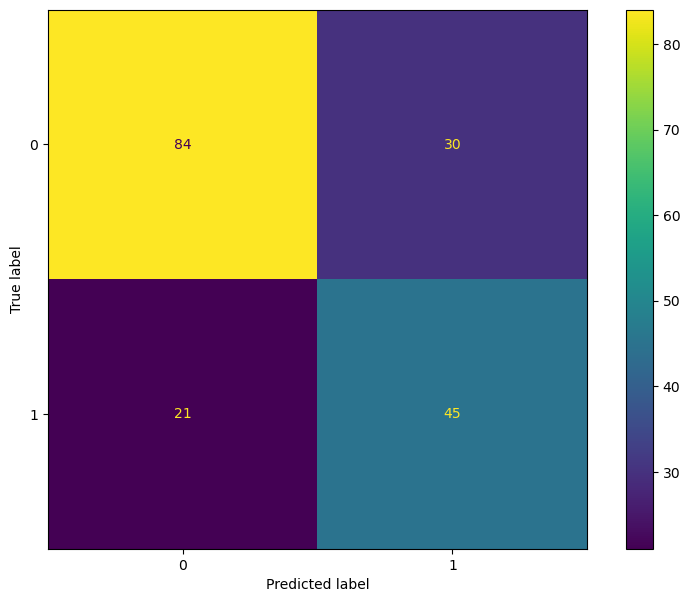

In [93]:
# the confusion matrix for the Best Model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_eval)

cm = confusion_matrix(Y_eval, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [98]:
#Prediction on test data

test_pred = RF_model_tuned.predict(test_scaled)
test_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [99]:
df_test['Sepssis']=test_pred
df_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,0
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,0
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,0
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,0
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,1
...,...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1,0
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1,0
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1,0
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1,1


In [101]:
df_test.to_csv('Sepssis predicted(ml_notrim).csv', index=False)

In [102]:
# Creating a dictionary of objects to export
# Creating a dictionary of objects to export
exports = {"Labelencoder": le,
           "scaler": scaler,
           "model": rf}

# Exporting the dictionary with Pickle
with open("ml_notrim", "wb") as file:
    pickle.dump(exports, file)